In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 

In [2]:
apple = pd.read_csv("apple.csv")
google = pd.read_csv('google.csv')

In [3]:
# change apple dataset size into numeric type
apple['size']=apple['size'].apply(lambda x: x.replace(',','') if ',' in str(x) else x).apply(float)

Part A: basic data description

In [4]:
apple.describe()

,Unnamed: 0,size,price,rating_count,rating_count_ver,rating,rating_ver
count,7189.000000,7189.000000,7189.000000,7.189000e+03,7189.000000,7189.000000,7189.000000
mean,3594.000000,199.273253,1.728139,1.290537e+04,460.484212,3.529142,3.255321
std,2075.429875,359.374752,5.835966,7.578048e+04,3922.515428,1.515829,1.808135
min,0.000000,0.590000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1797.000000,46.950000,0.000000,2.800000e+01,1.000000,3.500000,2.500000
50%,3594.000000,97.182000,0.000000,3.010000e+02,23.000000,4.000000,4.000000
75%,5391.000000,181.941000,1.990000,2.793000e+03,140.000000,4.500000,4.500000
max,7188.000000,4025.970000,299.990000,2.974676e+06,177050.000000,5.000000,5.000000


In [5]:
google.describe()

,Unnamed: 0,rating,rating_count,size,installs,price
count,8196.000000,8196.000000,8.196000e+03,7027.000000,8.196000e+03,8196.000000
mean,4097.500000,4.173243,2.552515e+05,21.754427,9.165090e+06,1.037884
std,2366.125736,0.536625,1.985594e+06,22.726503,5.825087e+07,16.857882
min,0.000000,1.000000,1.000000e+00,0.008500,1.000000e+00,0.000000
25%,2048.750000,4.000000,1.260000e+02,4.900000,1.000000e+04,0.000000
50%,4097.500000,4.300000,3.004000e+03,13.000000,1.000000e+05,0.000000
75%,6146.250000,4.500000,4.381300e+04,31.000000,1.000000e+06,0.000000
max,8195.000000,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


In [7]:
# divide size into four subcategories--google
google['sizedummy']=np.zeros(len(google['size']))
for i in range(len(google['size'])):
    if google['size'].iloc[i] <=4.9:
        google['sizedummy'].iloc[i] = 'Small'
    elif google['size'].iloc[i] <=13:
        google['sizedummy'].iloc[i] = 'MediumSmall'
    elif google['size'].iloc[i] <=31:
        google['sizedummy'].iloc[i] = 'MidiumLarge'
    else:
        google['sizedummy'].iloc[i] = 'Large'

In [8]:
# divide size into four subcategories--apple
apple['sizedummy']=np.zeros(len(apple['size']))
for i in range(len(apple['size'])):
    if apple['size'].iloc[i] <=46.95:
        apple['sizedummy'].iloc[i] = 'Small'
    elif apple['size'].iloc[i] <=97.18:
        apple['sizedummy'].iloc[i] = 'MediumSmall'
    elif apple['size'].iloc[i] <=181.94:
        apple['sizedummy'].iloc[i] = 'MidiumLarge'
    else:
        apple['sizedummy'].iloc[i] = 'Large'
# lack original data

In [9]:
# # divide price into four subcategories--google
# google['pricedummy']=np.zeros(len(google['price']))
# for i in range(len(google['price'])):
#     if google['price'].iloc[i] == 0:
#         google['pricedummy'].iloc[i] = 'Free'
#     elif google['price'].iloc[i] <=1.99:
#         google['pricedummy'].iloc[i] = 'Low'
#     elif google['price'].iloc[i] <=2.99:
#         google['pricedummy'].iloc[i] = 'Midium'
#     else:
#         google['pricedummy'].iloc[i] = 'High'

In [10]:
apple['type'] = np.where(apple['price']==0,'Free','Paid')
apple

,Unnamed: 0,app,size,price,rating_count,rating_count_ver,rating,rating_ver,content,category,sizedummy,type
0,0,PAC-MAN Premium,100.788,3.99,21292,26,4.0,4.5,4+,Games,MidiumLarge,Paid
1,1,Evernote - stay organized,158.579,0.00,161065,26,4.0,3.5,4+,Productivity,MidiumLarge,Free
2,2,"WeatherBug - Local Weather, Radar, Maps, Alerts",100.524,0.00,188583,2822,3.5,4.5,4+,Weather,MidiumLarge,Free
3,3,"eBay: Best App to Buy, Sell, Save! Online Shop...",128.512,0.00,262241,649,4.0,4.5,12+,Shopping,MidiumLarge,Free
4,4,Bible,92.774,0.00,985920,5320,4.5,5.0,4+,Books & Reference,MediumSmall,Free
5,5,Shanghai Mahjong,10.486,0.99,8253,5516,4.0,4.0,4+,Games,Small,Paid
6,6,PayPal - Send and request money safely,227.796,0.00,119487,879,4.0,4.5,4+,Finance,Large,Free
7,7,Pandora - Music & Radio,130.243,0.00,1126879,3594,4.0,4.5,12+,Entertainment,MidiumLarge,Free
8,8,PCalc - The Best Calculator,49.250,9.99,1117,4,4.5,5.0,4+,Utilities,MediumSmall,Paid
9,9,Ms. PAC-MAN,70.023,3.99,7885,40,4.0,4.0,4+,Games,MediumSmall,Paid


In [11]:
apple 

,Unnamed: 0,app,size,price,rating_count,rating_count_ver,rating,rating_ver,content,category,sizedummy,type
0,0,PAC-MAN Premium,100.788,3.99,21292,26,4.0,4.5,4+,Games,MidiumLarge,Paid
1,1,Evernote - stay organized,158.579,0.00,161065,26,4.0,3.5,4+,Productivity,MidiumLarge,Free
2,2,"WeatherBug - Local Weather, Radar, Maps, Alerts",100.524,0.00,188583,2822,3.5,4.5,4+,Weather,MidiumLarge,Free
3,3,"eBay: Best App to Buy, Sell, Save! Online Shop...",128.512,0.00,262241,649,4.0,4.5,12+,Shopping,MidiumLarge,Free
4,4,Bible,92.774,0.00,985920,5320,4.5,5.0,4+,Books & Reference,MediumSmall,Free
5,5,Shanghai Mahjong,10.486,0.99,8253,5516,4.0,4.0,4+,Games,Small,Paid
6,6,PayPal - Send and request money safely,227.796,0.00,119487,879,4.0,4.5,4+,Finance,Large,Free
7,7,Pandora - Music & Radio,130.243,0.00,1126879,3594,4.0,4.5,12+,Entertainment,MidiumLarge,Free
8,8,PCalc - The Best Calculator,49.250,9.99,1117,4,4.5,5.0,4+,Utilities,MediumSmall,Paid
9,9,Ms. PAC-MAN,70.023,3.99,7885,40,4.0,4.0,4+,Games,MediumSmall,Paid


In [12]:
## 1. for andriod market
def pie_graph(data,feature):
    new_data = data.groupby(feature).size().sort_values(ascending = False)
    label = list(new_data.index)
    x = list(new_data)
    abc = [(label[i],x[i]) for i in range(len(label))]
    ab = abc[:5]
    new_label = [item[0] for item in ab]
    new_x = [item[1] for item in ab]
    new_label.append('Others')
    total = [item[1] for item in abc]
    new_x.append(sum(total)-sum(new_x))
    fig = plt.figure()
    plt.axes(aspect=1)
    plt.pie(new_x,labels=new_label,autopct='%1.2f%%',shadow= True) 
    plt.title(feature.capitalize()+" Distribution")
    plt.show()

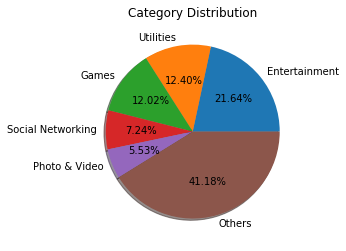

In [13]:
pie_graph(google,'category')

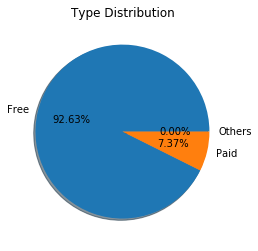

In [14]:
pie_graph(google,'type')

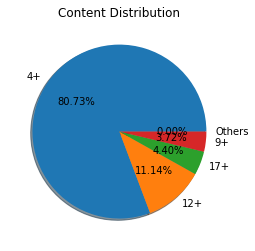

In [15]:
pie_graph(google,'content')

In [16]:
## 2. for apple market

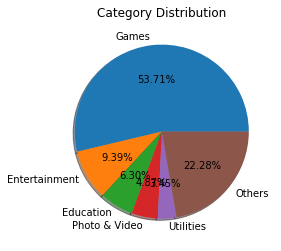

In [17]:
pie_graph(apple,'category')

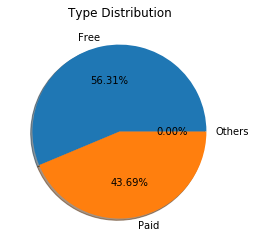

In [18]:
pie_graph(apple,'type')

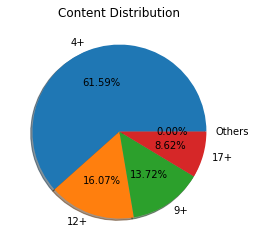

In [19]:
pie_graph(apple,'content')

Part B: relationship between features/groupby analysis

In [20]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})

import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.figure_factory as ff
# import cufflinks as cf


import warnings
warnings.filterwarnings('ignore')

In [21]:
# 1.1 for google playstore, boxplot between category vs price
from matplotlib import pyplot as plt
import plotly
groups = google.groupby('category').filter(lambda x: len(x) >= 10).reset_index()
print('Average price = ', np.nanmean(list(groups.price)))
# print('Medium rating = ', np.nanmedian(list(groups.rating)))
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 720, len(set(groups.category)))]

layout = {'title' : 'Google Playstore: App prices across categories',
        'xaxis': {'tickangle':-40},
        'yaxis': {'title': 'Price'},
          'plot_bgcolor': 'rgb(250,250,250)',
          'shapes': [{
              'type' :'line',
              'x0': -.5,
              'y0': np.nanmean(list(groups.price)),
              'x1': 19,
              'y1': np.nanmean(list(groups.price)),
              'line': { 'dash': 'dashdot'}
          }]
          }

data = [{
    'y': google.loc[google.category==category]['price'], 
    'type':'box',
    'name' : category,
    'showlegend':False,
    #'marker': {'color': 'Set2'},
    } for i,category in enumerate(list(set(groups.category)))]

plotly.offline.iplot({'data': data, 'layout': layout})

Average price =  1.0378843338213763


In [22]:
# Outliers appear Finance, Entertainment and Lifestyle categories. We remove them and plot only those apps that aren't free again.
google = google[google['price']>0]
google = google[google['price']<50]

In [23]:
# After removing the outliers, draw a boxplot between category vs price again. 

from matplotlib import pyplot as plt
import plotly
groups = google.groupby('category').filter(lambda x: len(x) >= 2).reset_index()
print('Average price = ', np.nanmean(list(groups.price)))
# print('Medium rating = ', np.nanmedian(list(groups.rating)))
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 720, len(set(groups.category)))]

layout = {'title' : 'Google Playstore: App prices across categories',
        'xaxis': {'tickangle':-40},
        'yaxis': {'title': 'Price'},
          'plot_bgcolor': 'rgb(250,250,250)',
          'shapes': [{
              'type' :'line',
              'x0': -.5,
              'y0': np.nanmean(list(groups.price)),
              'x1': 19,
              'y1': np.nanmean(list(groups.price)),
              'line': { 'dash': 'dashdot'}
          }]
          }

data = [{
    'y': google.loc[google.category==category]['price'], 
    'type':'box',
    'name' : category,
    'showlegend':False,
    #'marker': {'color': 'Set2'},
    } for i,category in enumerate(list(set(groups.category)))]

plotly.offline.iplot({'data': data, 'layout': layout})

Average price =  4.348044217687076


In [24]:
# 1.2 for appstore, boxplot between category vs price
from matplotlib import pyplot as plt
import plotly
groups = apple.groupby('category').filter(lambda x: len(x) >= 10).reset_index()
print('Average price = ', np.nanmean(list(groups.price)))
# print('Medium rating = ', np.nanmedian(list(groups.rating)))
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 720, len(set(groups.category)))]

layout = {'title' : 'Apple Appstore: App prices across categories',
        'xaxis': {'tickangle':-40},
        'yaxis': {'title': 'Price'},
          'plot_bgcolor': 'rgb(250,250,250)',
          'shapes': [{
              'type' :'line',
              'x0': -.5,
              'y0': np.nanmean(list(groups.price)),
              'x1': 19,
              'y1': np.nanmean(list(groups.price)),
              'line': { 'dash': 'dashdot'}
          }]
          }

data = [{
    'y': apple.loc[apple.category==category]['price'], 
    'type':'box',
    'name' : category,
    'showlegend':False,
    #'marker': {'color': 'Set2'},
    } for i,category in enumerate(list(set(groups.category)))]

plotly.offline.iplot({'data': data, 'layout': layout})

Average price =  1.7281388232021144


In [25]:
# Outliers appear in Education ategory. We remove them and plot the apps that aren't free, again.
apple = apple[apple['price']<50]
apple = apple[apple['price']>0]

In [26]:
from matplotlib import pyplot as plt
import plotly
groups = apple.groupby('category').filter(lambda x: len(x) >= 10).reset_index()
print('Average price = ', np.nanmean(list(groups.price)))
# print('Medium rating = ', np.nanmedian(list(groups.rating)))
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 720, len(set(groups.category)))]

layout = {'title' : 'Apple Appstore: App prices across categories',
        'xaxis': {'tickangle':-40},
        'yaxis': {'title': 'Price'},
          'plot_bgcolor': 'rgb(250,250,250)',
          'shapes': [{
              'type' :'line',
              'x0': -.5,
              'y0': np.nanmean(list(groups.price)),
              'x1': 19,
              'y1': np.nanmean(list(groups.price)),
              'line': { 'dash': 'dashdot'}
          }]
          }

data = [{
    'y': apple.loc[apple.category==category]['price'], 
    'type':'box',
    'name' : category,
    'showlegend':False,
    #'marker': {'color': 'Set2'},
    } for i,category in enumerate(list(set(groups.category)))]

plotly.offline.iplot({'data': data, 'layout': layout})

Average price =  3.6759240344717528


In [27]:
2.1 # for google playstore, boxplot between category vs rating
from matplotlib import pyplot as plt
import plotly
groups = google.groupby('category').filter(lambda x: len(x) >= 10).reset_index()
print('Average rating = ', np.nanmean(list(groups.rating)))
# print('Medium rating = ', np.nanmedian(list(groups.rating)))
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 720, len(set(groups.category)))]

layout = {'title' : 'Google Playstore: App ratings across categories',
        'xaxis': {'tickangle':-40},
        'yaxis': {'title': 'Rating'},
          'plot_bgcolor': 'rgb(250,250,250)',
          'shapes': [{
              'type' :'line',
              'x0': -.5,
              'y0': np.nanmean(list(groups.rating)),
              'x1': 19,
              'y1': np.nanmean(list(groups.rating)),
              'line': { 'dash': 'dashdot'}
          }]
          }

data = [{
    'y': google.loc[google.category==category]['rating'], 
    'type':'box',
    'name' : category,
    'showlegend':False,
    #'marker': {'color': 'Set2'},
    } for i,category in enumerate(list(set(groups.category)))]

plotly.offline.iplot({'data': data, 'layout': layout})

Average rating =  4.281203007518797


In [28]:
2.2 # for apple playstore, boxplot between category vs rating
from matplotlib import pyplot as plt
import plotly
groups = apple.groupby('category').filter(lambda x: len(x) >= 10).reset_index()
print('Average rating = ', np.nanmean(list(groups.rating)))

c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 720, len(set(groups.category)))]

layout = {'title' : 'Appstore: App ratings across categories',
        'xaxis': {'tickangle':-40},
        'yaxis': {'title': 'Rating'},
          'plot_bgcolor': 'rgb(250,250,250)',
          'shapes': [{
              'type' :'line',
              'x0': -.5,
              'y0': np.nanmean(list(groups.rating)),
              'x1': 19,
              'y1': np.nanmean(list(groups.rating)),
              'line': { 'dash': 'dashdot'}
          }]
          }

data = [{
    'y': apple.loc[apple.category==category]['rating'], 
    'type':'box',
    'name' : category,
    'showlegend':False,
    #'marker': {'color': 'Set2'},
    } for i,category in enumerate(list(set(groups.category)))]

plotly.offline.iplot({'data': data, 'layout': layout})

Average rating =  3.7197574210022344


In [29]:
3.1 # for google playstore, boxplot between size vs rating
from matplotlib import pyplot as plt
import plotly
groups = google.groupby('sizedummy').filter(lambda x: len(x) >= 170).reset_index()
print('Average rating = ', np.nanmean(list(groups.rating)))
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 720, len(set(groups.sizedummy)))]

layout = {'title' : 'Google Playstore: App ratings across sizes',
        'xaxis': {'tickangle':-40},
        'yaxis': {'title': 'Rating'},
          'plot_bgcolor': 'rgb(250,250,250)',
          'shapes': [{
              'type' :'line',
              'x0': -.5,
              'y0': np.nanmean(list(groups.rating)),
              'x1': 3,
              'y1': np.nanmean(list(groups.rating)),
              'line': { 'dash': 'dashdot'}
          }]
          }

data = [{
    'y': google.loc[google.sizedummy==sizedummy]['rating'], 
    'type':'box',
    'name' : sizedummy,
    'showlegend':False,
    #'marker': {'color': 'Set2'},
    } for i,sizedummy in enumerate(list(set(groups.sizedummy)))]

plotly.offline.iplot({'data': data, 'layout': layout})

Average rating =  4.267631578947369


In [30]:
3.2 # for apple appstore, boxplot between size vs rating
from matplotlib import pyplot as plt
import plotly
groups = apple.groupby('sizedummy').filter(lambda x: len(x) >= 170).reset_index()
# print('Average rating = ', np.nanmean(list(groups.rating)))
print(' rating = ', np.nanmean(list(groups.rating)))
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 720, len(set(groups.sizedummy)))]

layout = {'title' : 'Appstore: App ratings across sizes',
        'xaxis': {'tickangle':-40},
        'yaxis': {'title': 'Rating'},
          'plot_bgcolor': 'rgb(250,250,250)',
          'shapes': [{
              'type' :'line',
              'x0': -.5,
              'y0': np.nanmean(list(groups.rating)),
              'x1': 3,
              'y1': np.nanmean(list(groups.rating)),
              'line': { 'dash': 'dashdot'}
          }]
          }

data = [{
    'y': apple.loc[apple.sizedummy==sizedummy]['rating'], 
    'type':'box',
    'name' : sizedummy,
    'showlegend':False,
    #'marker': {'color': 'Set2'},
    } for i,sizedummy in enumerate(list(set(groups.sizedummy)))]

plotly.offline.iplot({'data': data, 'layout': layout})

 rating =  3.720006381620932
